# 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dados/CarPrice_Assignment.csv')

# 2. Tratando valores ausentes e etc. 

<Axes: >

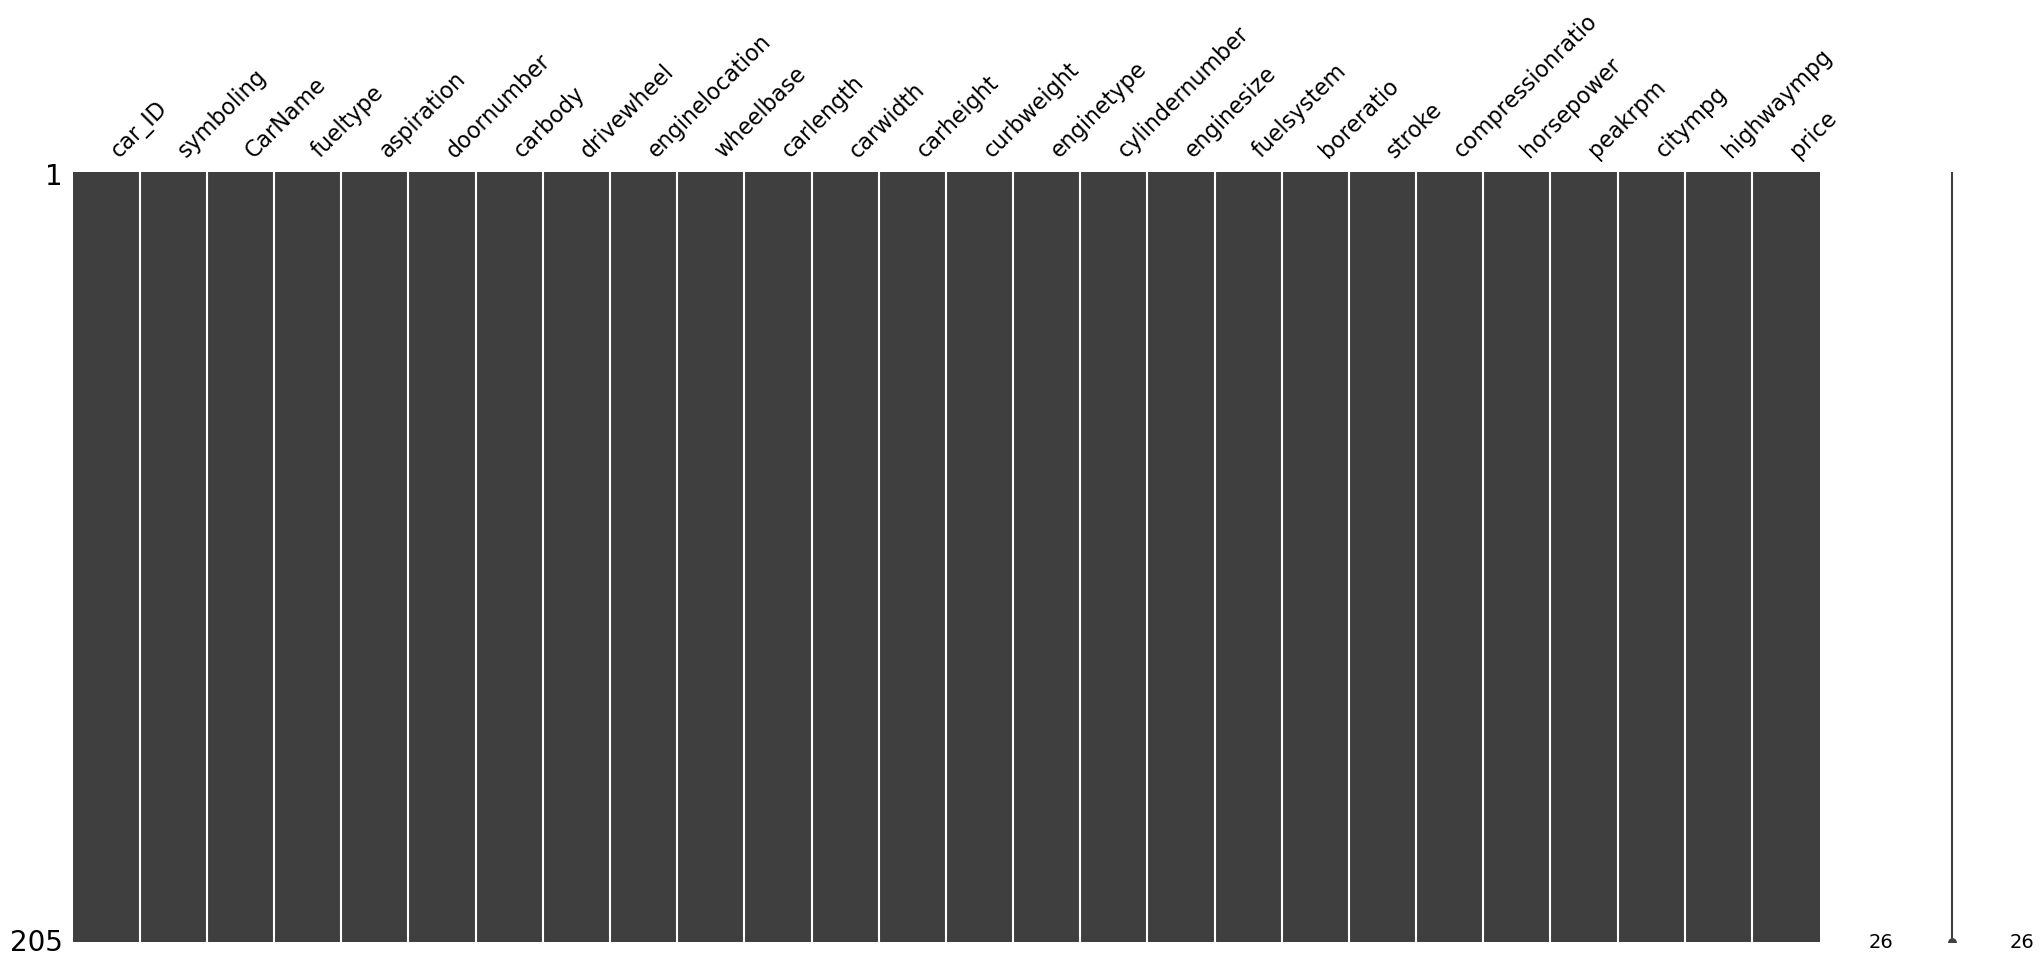

In [3]:
# Plotar o gráfico de matriz de dados ausentes
msno.matrix(df)

### Não temos valores ausentes para esse dataset

# 3. EDA

**Dicionário de dados**
Coluna|Descrição
-----|-----
Car_ID	|Sua classificação de risco de seguro atribuída, um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bastante seguro. (Categórico)
carCompany |	Nome da empresa de carros (categórica)
fueltype |	Tipo de combustível de carro, ou seja, gás ou diesel (categórico)
aspiration | 	Aspiração usada em um carro (categórico)
doornumber |	Número de portas em um carro (categórico)
carbody |	Corpo de carro (categórico)
drivewheel |	tipo de roda de acionamento (categórica)
enginelocation |	Localização do motor do carro (categórico)
wheelbase |	Weelbase de carro (numérico)
carlength |	Comprimento do carro (numérico)
carwidth |	Largura do carro (numérico)
carheight |	Altura do carro (numérico)
curbweight |	O peso de um carro sem ocupantes ou bagagem. (Numérico)
enginetype |	Tipo de motor. (Categórico)
cylindernumber |	Cilindro colocado no carro (categórico)
enginesize |	Tamanho do carro (numérico)
fuelsystem |	Sistema de combustível de carro (categórico)
boreratio |	Boreratio de carro (numérico)
stroke |	AVC ou volume dentro do motor (numérico)
compressionratio |	Taxa de compressão de carro (numérico)
horsepower |	Potência (numérica)
peakrpm |	RPM de pico de carro (numérico)
citympg |	Milhagem na cidade (numérica)
highwaympg |	Milhagem na rodovia (numérica)
price(Dependent variable) |	Preço do carro (numérico)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 3.2 Estatística descritiva

In [5]:
df.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


## 3.3 Comportamento da variavel dependente ('price')

In [6]:
# configuração de grafico

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

### 3.3.1 BoxPlot

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

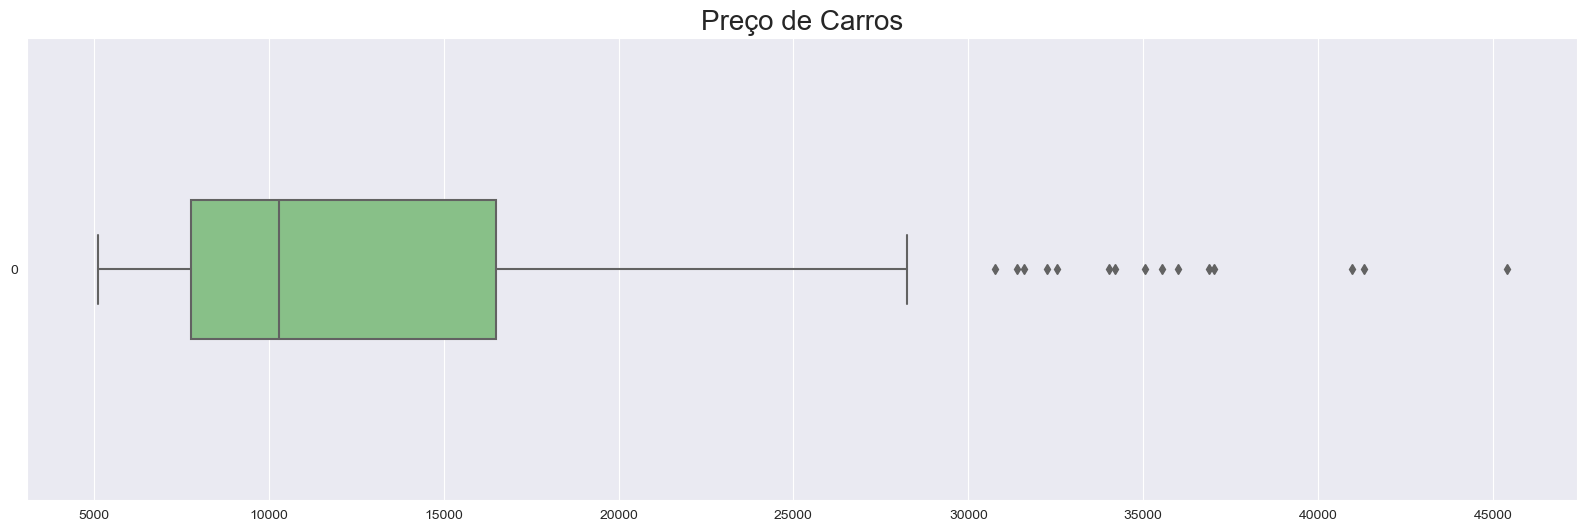

In [7]:
ax = sns.boxplot(df['price'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço de Carros', fontsize=20)
ax.set_xlabel('', fontsize=16)
ax;
df['price'].describe()

### 3.3.2 Outliers

In [8]:
# Calcular os limites inferior e superior do boxplot
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar as linhas que são outliers
outliers = df[(df['price'] < lower_limit) | (df['price'] > upper_limit)]

# Exibir as linhas que são outliers
outliers

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


**REMOVENDO OS OUTLIERS DO DATASET**

In [9]:
df = df.drop(outliers.index)

### 3.3.2 Distribuição de Frequencia

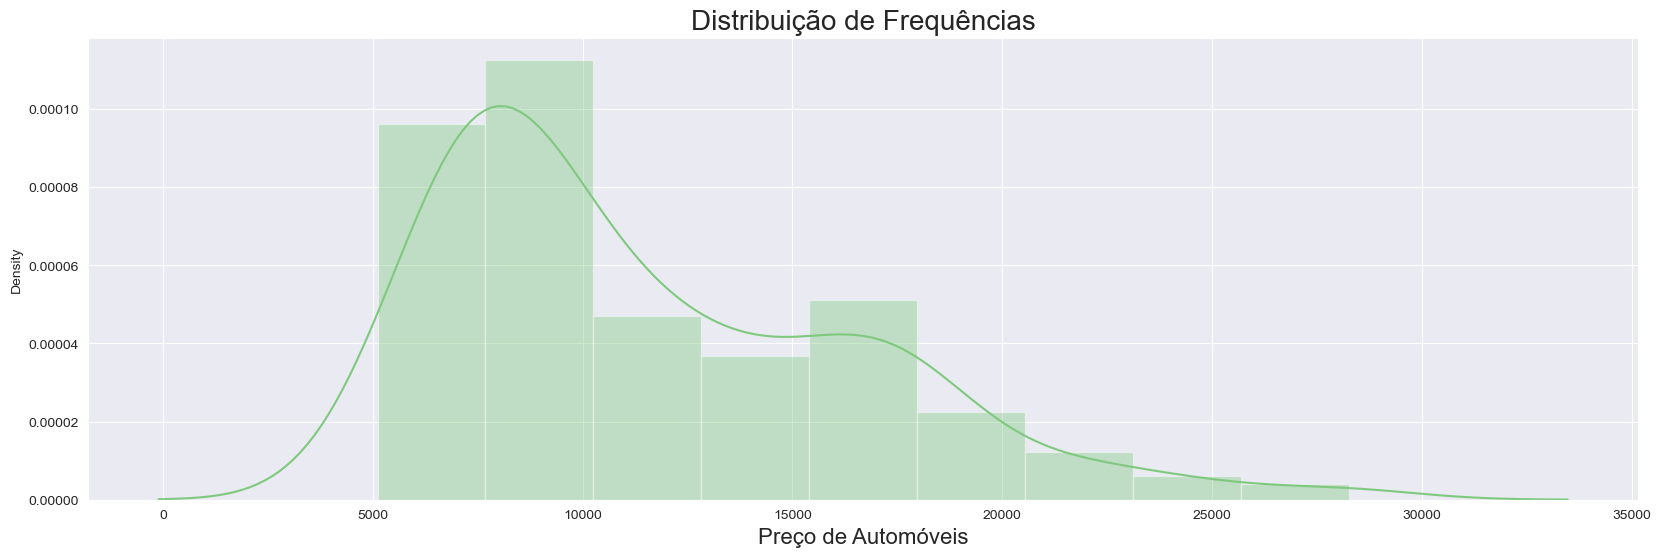

In [10]:
ax = sns.distplot(df['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax;

Assimetria a direita indica que possu uma concentração dos meus dados ente veiculos de 500 a 1000, o que pode fazer com que um eventual modelo não estime bem os valores fora desse intervalo

In [11]:
df.corr().round(2).loc['price']

car_ID              0.02
symboling          -0.13
wheelbase           0.67
carlength           0.73
carwidth            0.79
carheight           0.25
curbweight          0.85
enginesize          0.75
boreratio           0.50
stroke              0.08
compressionratio    0.19
horsepower          0.73
peakrpm            -0.14
citympg            -0.67
highwaympg         -0.69
price               1.00
Name: price, dtype: float64

Nesse caso, as variáveis com maior correlação positiva em relação ao preço são: enginesize (0.87), curbweight (0.84), carwidth (0.76) e horsepower (0.81). Isso sugere que, em geral, veículos com motores maiores, peso maior, maior largura e maior potência têm tendência a ter preços mais altos.

Por outro lado, as variáveis com maior correlação negativa em relação ao preço são: highwaympg (-0.70) e citympg (-0.69). Isso indica que veículos com maior consumo de combustível têm tendência a ter preços mais baixos.

É importante ressaltar que a correlação não implica em causalidade, ou seja, não podemos afirmar que uma variável causa diretamente o preço do carro, apenas que existe uma relação estatística entre elas.

# 4. Selecionando features

In [12]:
df.corr()['price']

car_ID              0.020822
symboling          -0.128941
wheelbase           0.667712
carlength           0.729734
carwidth            0.791890
carheight           0.254564
curbweight          0.853951
enginesize          0.749883
boreratio           0.499244
stroke              0.079378
compressionratio    0.185007
horsepower          0.727394
peakrpm            -0.136189
citympg            -0.670256
highwaympg         -0.686157
price               1.000000
Name: price, dtype: float64

## 4.1 PreProcessamento

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [14]:
del df['car_ID']
del df['CarName']

In [15]:
y = df['price']
X = df.iloc[:, :-1]

In [16]:
# Criar o objeto LabelEncoder
label_encoder = LabelEncoder()

# Iterar pelas colunas e codificar os valores de texto
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

In [17]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,1,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,1,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,2,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,1,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,0,136,5,3.19,3.40,8.0,115,5500,18,22


### 4.1.2 Tratando a variável symboling
<p>A variável symboling nos diz sobre a segurança de um automóvel que pode variar de -3 a 3, entretanto esses valores negativos podem atrapalhar a construção do modelo, portanto irei alterá-la para variar de 0 a 6.</p>

In [18]:
# Mapear os valores antigos para os novos valores
symboling_mapping = {3: 0, 1: 1, 2: 2, 0: 3, -1: 4, -2: 5}

# Aplicar o mapeamento à coluna 'symboling'
X['symboling'] = X['symboling'].map(symboling_mapping)

In [19]:
X['symboling'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

### 4.1.3 Calculando o logaritmo para as variaveis y

In [20]:
X_log = X.copy()
for column_name in X_log.columns:
    column = X_log[column_name]
    if ((column == 0).sum()) >0:
        X_log[column_name] = np.log(X_log[column_name]+1)
    else:
        X_log[column_name] = np.log(X_log[column_name])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy


In [23]:
# Converter X e y para arrays NumPy
X = X_train.values
y = y_train.values

In [24]:
# Inicializar o modelo de regressão que será usado pelo Boruta
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
# Inicializar o objeto Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

In [26]:
# Ajustar o Boruta ao conjunto de dados
boruta_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	13
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	13
I

BorutaPy(estimator=RandomForestRegressor(n_estimators=42,
                                         random_state=RandomState(MT19937) at 0x240A83EB840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x240A83EB840, verbose=2)

In [27]:
# Exibir as características selecionadas como importantes
selected_features = X_train.columns[boruta_selector.support_]
#selected_features = X_train.columns
print("Features selecionadas:")
print(selected_features)

Features selecionadas:
Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'highwaympg'],
      dtype='object')


In [28]:
X_train[selected_features]

,wheelbase,carwidth,curbweight,enginesize,horsepower,highwaympg
154,95.7,63.6,2290,92,62,32
10,101.2,64.8,2395,108,101,29
160,95.7,64.4,2094,98,70,47
190,94.5,64.0,2221,109,90,29
101,100.4,66.5,3095,181,152,22
...,...,...,...,...,...,...
94,94.5,63.8,1951,97,69,37
151,95.7,63.6,2040,92,62,38
148,96.9,65.4,2420,108,82,29
116,107.9,68.4,3252,152,95,33


# 5. Regressão Linear Multipla

In [29]:
modelo = LinearRegression()
modelo.fit(X_train[selected_features], y_train)

LinearRegression()

In [30]:
modelo.score(X_train[selected_features], y_train)

0.7908040669155354

# 6. Metricas do Modelo de Regressão Linear Multipla

## 6.1 Erro Médio Absoluto (Mean Absolute Error - MAE):
O MAE calcula a média das diferenças absolutas entre as previsões do modelo e os valores verdadeiros. Ele mede a magnitude média do erro sem considerar a direção (positivo ou negativo) do erro.


In [31]:
previsoes = modelo.predict(X_test[selected_features])
valores_verdadeiros = y_test

# Cálculo das diferenças absolutas entre previsões e valores verdadeiros
diferencas_absolutas = [abs(previsao - verdadeiro) for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Cálculo do MAE (Erro Médio Absoluto)
mae = sum(diferencas_absolutas) / len(diferencas_absolutas)

print("MAE:", mae)


MAE: 1722.1868387837092


## 6.2 Erro Quadrático Médio (Mean Squared Error - MSE):
O MSE calcula a média dos quadrados das diferenças entre as previsões do modelo e os valores verdadeiros. É uma métrica mais sensível a erros maiores, pois os erros são elevados ao quadrado.


In [32]:
previsoes = modelo.predict(X_test[selected_features])
valores_verdadeiros = y_test

# Cálculo das diferenças entre previsões e valores verdadeiros
diferencas = [previsao - verdadeiro for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Eleva as diferenças ao quadrado
quadrados_diferencas = [dif ** 2 for dif in diferencas]

# Cálculo do MSE (Erro Quadrático Médio)
mse = sum(quadrados_diferencas) / len(quadrados_diferencas)

print("MSE:", mse)


MSE: 5764704.072581817


## 6.3 Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE):
O RMSE é a raiz quadrada do MSE e é frequentemente usado para fornecer uma métrica de erro na mesma unidade da variável dependente. É uma métrica útil para comparar diretamente com os valores originais do conjunto de dados.

In [33]:
import math

previsoes = modelo.predict(X_test[selected_features])
valores_verdadeiros = y_test

# Cálculo das diferenças entre previsões e valores verdadeiros
diferencas = [previsao - verdadeiro for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Eleva as diferenças ao quadrado
quadrados_diferencas = [dif ** 2 for dif in diferencas]

# Cálculo do MSE (Erro Quadrático Médio)
mse = sum(quadrados_diferencas) / len(quadrados_diferencas)

# Cálculo do RMSE (Raiz do Erro Quadrático Médio)
rmse = math.sqrt(mse)

print("RMSE:", rmse)


RMSE: 2400.979815113367


## 6.4 Coeficiente de Determinação (R²):
O R² mede a proporção da variabilidade da variável dependente que é explicada pelo modelo. Ele varia de 0 a 1, sendo 1 indicativo de um modelo perfeito que explica toda a variabilidade dos dados.


In [34]:
from sklearn.metrics import r2_score

# Suponha que você tenha as previsões e os valores verdadeiros armazenados em listas
previsoes = modelo.predict(X_test[selected_features])
valores_verdadeiros = y_test

# Cálculo do R² (Coeficiente de Determinação)
r2 = r2_score(valores_verdadeiros, previsoes)

print("R²:", r2)

R²: 0.6640769092871415


## 6.5 O R-quadrado ajustado (Adjusted R-squared) 
Métrica relacionada ao R-quadrado (R²) que leva em consideração o número de variáveis independentes no modelo. O R² mede a proporção da variabilidade da variável dependente que é explicada pelo modelo, mas tende a aumentar à medida que mais variáveis independentes são adicionadas, mesmo que essas variáveis não sejam realmente relevantes para explicar a variabilidade.

O R-quadrado ajustado corrige essa limitação, penalizando a adição de variáveis independentes que não melhoram significativamente o poder explicativo do modelo. Quanto mais próximo o R-quadrado ajustado estiver de 1, melhor é o modelo em explicar a variabilidade da variável dependente, levando em conta o número de variáveis independentes.

Para calcular o R-quadrado ajustado, você pode usar a seguinte fórmula:

R-quadrado ajustado = 1 - ((1 - R²) * (n - 1) / (n - p - 1))

onde:

R² é o coeficiente de determinação (R-quadrado) que você já conhece.
n é o número total de observações no conjunto de dados.
p é o número de variáveis independentes (ou graus de liberdade) no modelo.

In [35]:
previsoes = modelo.predict(X_test[selected_features])
valores_verdadeiros = y_test


# Suponha que você tenha o valor do R-quadrado (R²) e o número de variáveis independentes (p) disponíveis
r_squared = r2_score(valores_verdadeiros, previsoes)
n = X_test.shape[0]
p = len(selected_features)

# Cálculo do R-quadrado ajustado
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.6149174325974549


## 6.6 Erro Percentual Absoluto Médio (Mean Absolute Percentage Error - MAPE):
O MAPE calcula a média das porcentagens absolutas das diferenças entre as previsões do modelo e os valores verdadeiros. É útil quando você deseja avaliar o desempenho do modelo em termos de porcentagem de erro.


In [36]:
previsoes = modelo.predict(X_test[selected_features])
valores_verdadeiros = y_test

# Cálculo das diferenças absolutas entre previsões e valores verdadeiros
diferencas_absolutas = [abs(previsao - verdadeiro) for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Cálculo das porcentagens absolutas em relação aos valores verdadeiros
porcentagens_absolutas = [dif / verdadeiro * 100 for dif, verdadeiro in zip(diferencas_absolutas, valores_verdadeiros)]

# Cálculo do MAPE (Erro Percentual Absoluto Médio)
mape = sum(porcentagens_absolutas) / len(porcentagens_absolutas)

print("MAPE:", mape)


MAPE: 14.468689511890416


## 6.7 Erro Percentual Médio (Mean Percentage Error - MPE):
O MPE calcula a média das porcentagens das diferenças entre as previsões do modelo e os valores verdadeiros. Ele pode ser usado para verificar se o modelo tende a superestimar ou subestimar os valores verdadeiros.

In [37]:
previsoes = modelo.predict(X_test[selected_features])
valores_verdadeiros = y_test

# Cálculo das diferenças entre previsões e valores verdadeiros
diferencas = [previsao - verdadeiro for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Cálculo das porcentagens em relação aos valores verdadeiros
porcentagens = [dif / verdadeiro * 100 for dif, verdadeiro in zip(diferencas, valores_verdadeiros)]

# Cálculo do MPE (Erro Percentual Médio)
mpe = sum(porcentagens) / len(porcentagens)

print("MPE:", mpe)


MPE: 2.5597568943232627
